<a href="https://colab.research.google.com/github/sapeksh98/cse111/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
file_path = "dataset_spotify.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df = df.drop(columns=["Unnamed: 0", "track_id", "album_name"])

In [ ]:
columns_to_drop = ["track_name", "artists"]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
print("Missing values per column:\n", df.isna().sum())

Missing values per column:
 popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


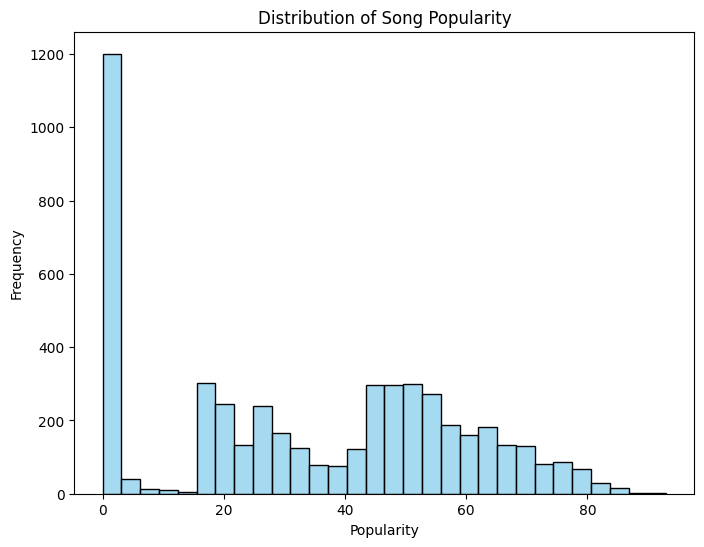

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(df['popularity'], bins=30, color='skyblue')
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

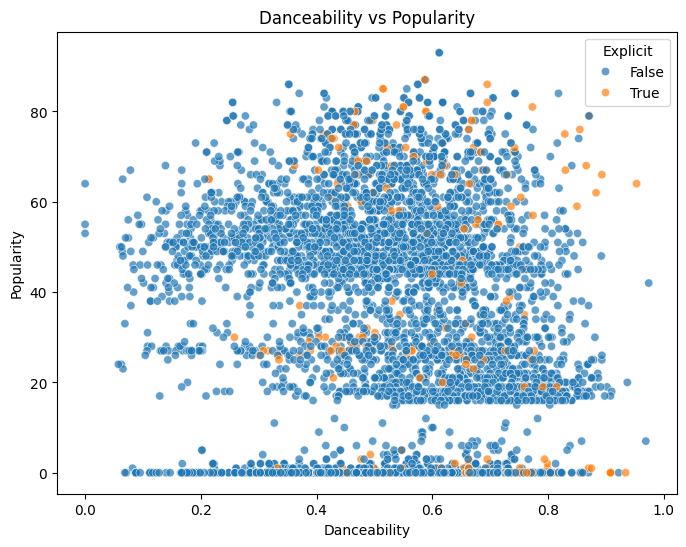

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='danceability', y='popularity', data=df, hue='explicit', alpha=0.7)
plt.title("Danceability vs Popularity")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.legend(title="Explicit")
plt.show()


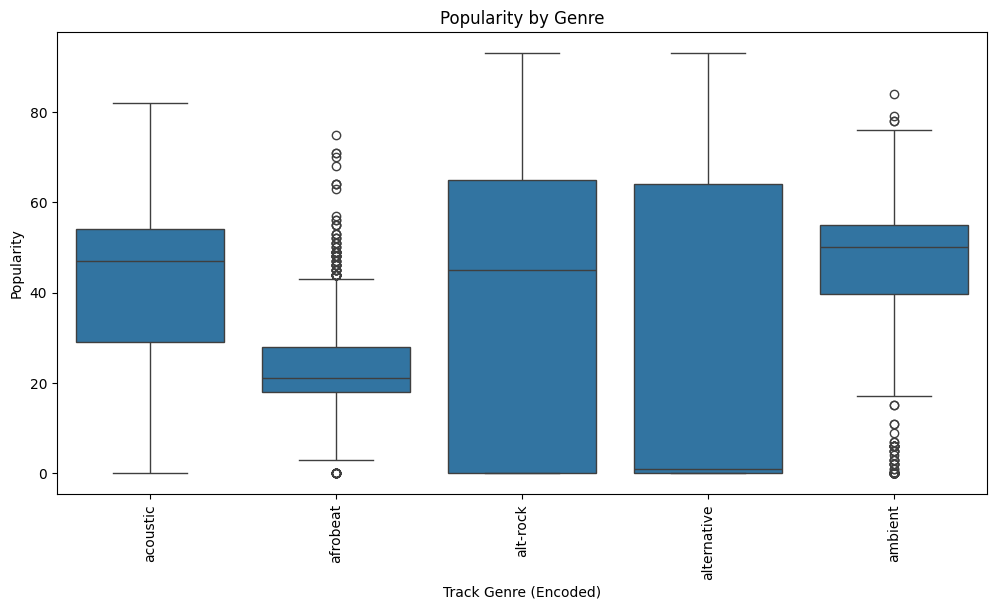

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='track_genre', y='popularity', data=df)
plt.title("Popularity by Genre")
plt.xlabel("Track Genre (Encoded)")
plt.ylabel("Popularity")
plt.xticks(rotation=90)
plt.show()


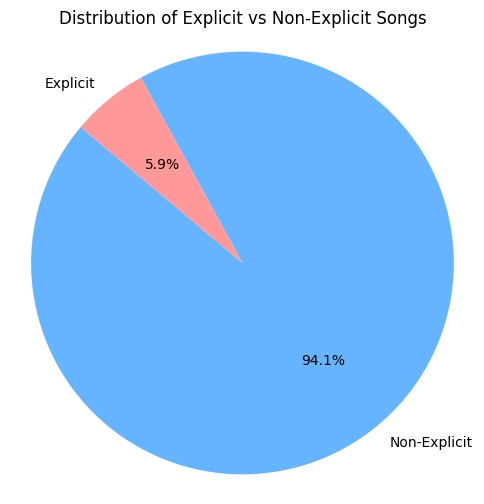

In [ ]:

explicit_counts = df['explicit'].value_counts()
labels = ['Non-Explicit', 'Explicit']
colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=(6, 6))
plt.pie(explicit_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Distribution of Explicit vs Non-Explicit Songs")
plt.axis('equal')
plt.show()

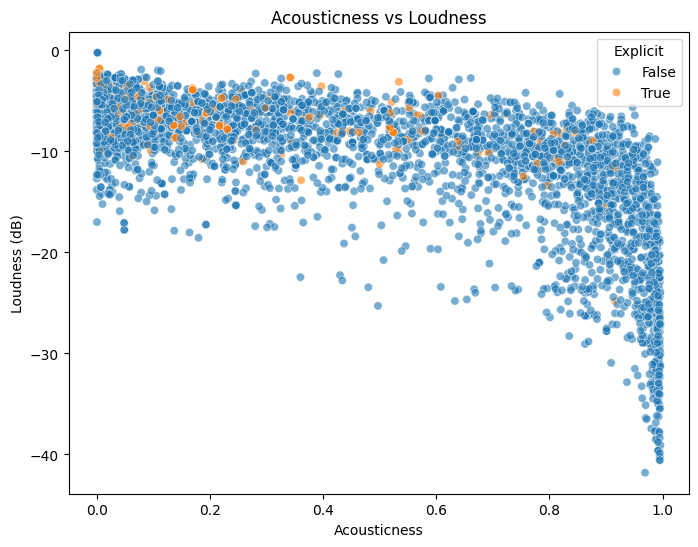

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='acousticness', y='loudness', data=df, hue='explicit', alpha=0.6)
plt.title("Acousticness vs Loudness")
plt.xlabel("Acousticness")
plt.ylabel("Loudness (dB)")
plt.legend(title="Explicit")
plt.show()

<ipython-input-18-318f90743e98>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')


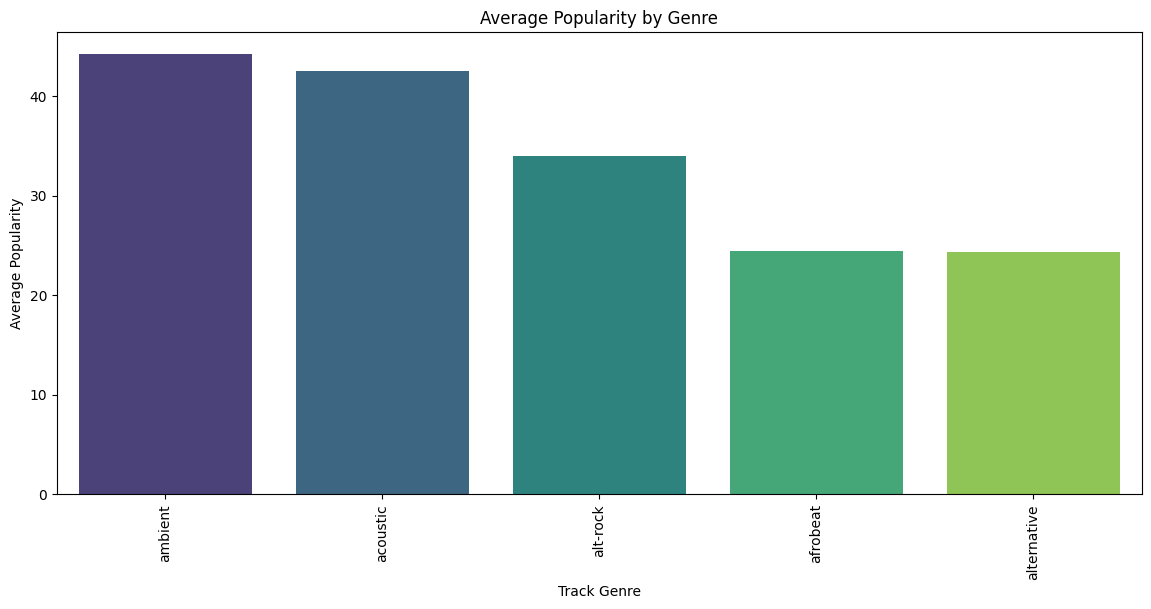

In [ ]:
plt.figure(figsize=(14, 6))
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')
plt.title("Average Popularity by Genre")
plt.xlabel("Track Genre")
plt.ylabel("Average Popularity")
plt.xticks(rotation=90)
plt.show()

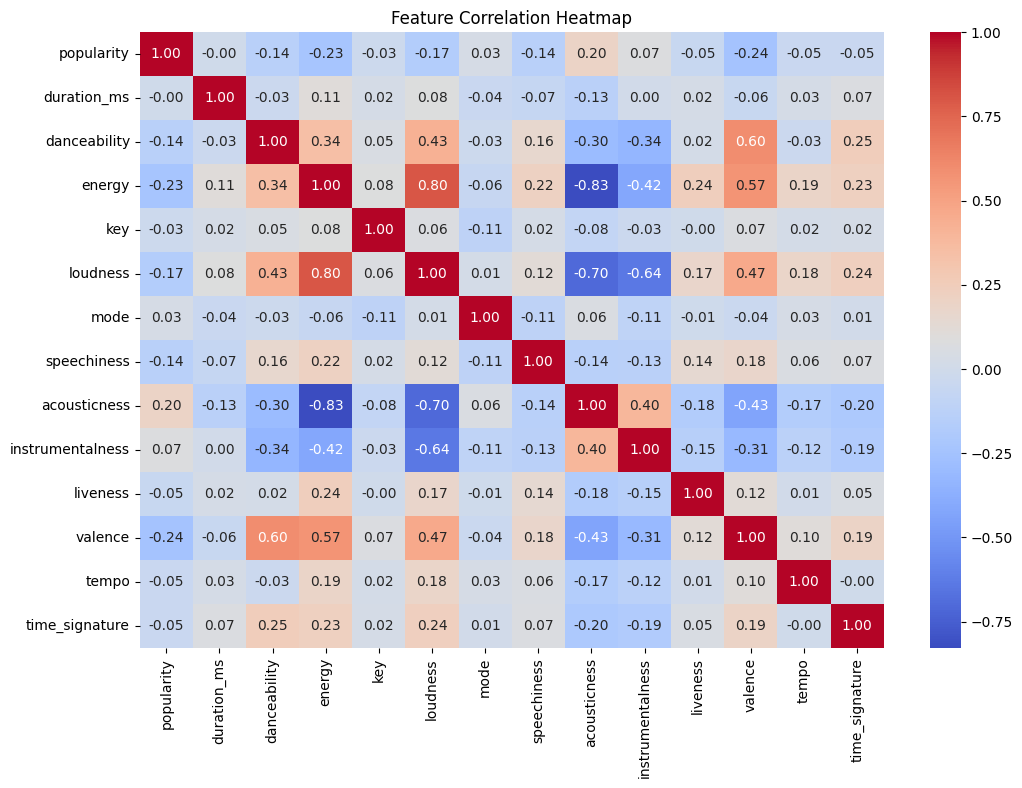

In [ ]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop(columns=["popularity"])
y = df["popularity"]


In [ ]:

X = X.select_dtypes(include=[np.number])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:

y_pred = model.predict(X_test)

In [ ]:

mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)

print("Random Forest Regressor")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

Random Forest Regressor
MAE: 13.30
RMSE: 18.12
R² Score: 0.47


In [ ]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")

Linear Regression
MAE: 19.96
RMSE: 24.12
R² Score: 0.05
